In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.dates as mdates

from tidegauge_functions import read_tidegauge_psmsl

# %matplotlib notebook
%matplotlib inline
# %matplotlib widget

In [17]:
def read_rbr(filepath):
    df = pd.read_fwf(filepath, 
                     skiprows=13, 
                     headers=None,
                    )
    
    columns = ['Cruise', 'Station', 'Type', 'Date', 'Time', 'Longitude', 'Latitude', 'BotDepth', 'Depth', 'Temperature', 'Pressure', 'SeaPressure']
    if len(df.columns) == len(columns):
        df.columns = columns

    df['Datetime'] = pd.to_datetime(df['Date'].apply(str)+' '+df['Time'])

    dt = pd.to_datetime(df['Datetime'])

    # create datetime index
    df.index = pd.DatetimeIndex(dt)
    
    return df



def read_rbr_csv(filepath):
    df = pd.read_csv(filepath)
    df.index = pd.to_datetime(df['Time'])
    # delete Time column
    
    return df

In [18]:
# file_in = 'EtEllerAndet_20201018'
# dir_in = 'data/greenlandrising_tidegauge_data/aasiaat/RBR/20220914_1717/'
# file_in = '204972_20220914_1717'
dir_in = '/Users/dporter/Downloads/GreenlandRising_data/204962_20220918_1157'
file_in = '204962_20220918_1157_data'

ext = '.txt'
filepath = os.path.join(dir_in, file_in + ext)

df_rbr = read_rbr_csv(filepath)

df_rbr

,Time,Temperature,Pressure,Sea pressure,Depth,Tidal slope
Time,,,,,,
2022-09-18 06:29:00,2022-09-18 06:29:00.000,2.387111,9.968077,-0.164423,-0.163082,NaN
2022-09-18 06:39:00,2022-09-18 06:39:00.000,1.823355,9.967579,-0.164921,-0.163577,NaN
2022-09-18 06:49:00,2022-09-18 06:49:00.000,2.410338,9.968783,-0.163717,-0.162382,NaN
2022-09-18 06:59:00,2022-09-18 06:59:00.000,2.028100,9.968754,-0.163746,-0.162411,NaN
2022-09-18 07:09:00,2022-09-18 07:09:00.000,1.848641,9.968974,-0.163526,-0.162192,NaN
...,...,...,...,...,...,...
2022-09-21 05:29:00,2022-09-21 05:29:00.000,0.058975,13.530626,3.398126,3.370415,NaN
2022-09-21 05:39:00,2022-09-21 05:39:00.000,0.054678,13.524498,3.391998,3.364338,NaN
2022-09-21 05:49:00,2022-09-21 05:49:00.000,0.059775,13.566841,3.434341,3.406335,NaN


/Users/dporter/.conda/envs/tidegauges-historical/lib/python3.8/site-packages/pandas/plotting/_matplotlib/__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()
/Users/dporter/.conda/envs/tidegauges-historical/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/dporter/.conda/envs/tidegauges-historical/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/dporter/.conda/envs/tidegauges-historical/lib/python3.8/s

array([<AxesSubplot:xlabel='Time'>, <AxesSubplot:xlabel='Time'>,
       <AxesSubplot:xlabel='Time'>], dtype=object)

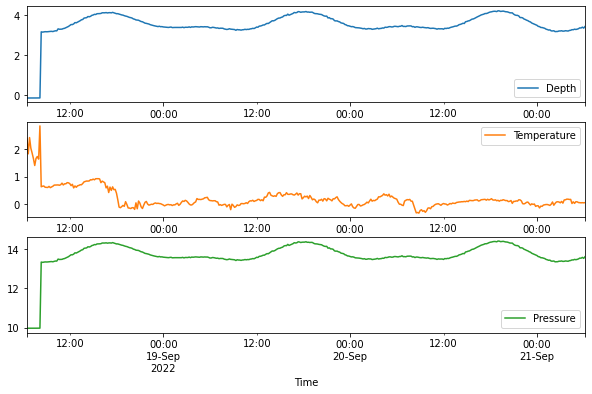

In [16]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
df_rbr[['Depth', 'Temperature', 'Pressure']].plot(subplots=True, ax=ax)

# Read in TPX09 output

In [30]:
def read_pyTMDoutput_csv(filepath):
    df = pd.read_csv(filepath)
    df.index = pd.to_datetime(df['Unnamed: 0'])
    # delete Time column
    
    return df

In [40]:
dir_in = '../pyTMD/'
file_in = 'Kullorsuaq_H_2022-09-16'
ext = '.csv'
filepath = os.path.join(dir_in, file_in + ext)

df_model = read_pyTMDoutput_csv(filepath)
# df_model = pd.read_csv(filepath)
df_model

,Unnamed: 0,TIME,SSH
Unnamed: 0,,,
2022-09-15 22:00:00-02:00,2022-09-15 22:00:00-02:00,0.000000,-24.182034
2022-09-15 22:01:00-02:00,2022-09-15 22:01:00-02:00,0.000694,-24.280448
2022-09-15 22:02:00-02:00,2022-09-15 22:02:00-02:00,0.001389,-24.376096
2022-09-15 22:03:00-02:00,2022-09-15 22:03:00-02:00,0.002083,-24.468971
2022-09-15 22:04:00-02:00,2022-09-15 22:04:00-02:00,0.002778,-24.559067
...,...,...,...
2022-09-22 21:55:00-02:00,2022-09-22 21:55:00-02:00,6.996528,51.547775
2022-09-22 21:56:00-02:00,2022-09-22 21:56:00-02:00,6.997222,51.908735
2022-09-22 21:57:00-02:00,2022-09-22 21:57:00-02:00,6.997917,52.267652


<AxesSubplot:xlabel='Unnamed: 0'>

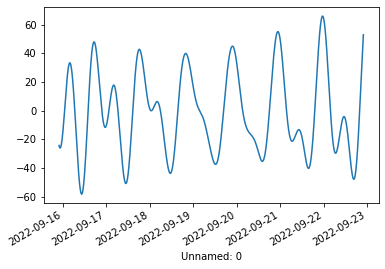

In [43]:
df_model['SSH'].plot()

## shift

In [69]:
# compare_start = pd.Timestamp('2022-08-24T00:00')
# compare_end = pd.Timestamp('2022-08-27T00:00')

compare_start = df_rbr.index[100]
compare_end = df_rbr.index[-1]
print(f'{comp_start} to {comp_end}')

2022-09-18 06:29:00 to 2022-09-21 06:09:00


In [89]:
z_shift_rbr = (df_rbr['Depth'].loc[compare_start:compare_end].mean() - df_model['SSH'].loc[compare_start:compare_end].mean()/100)
print(z_shift_rbr)
df_rbr['Depth_shifted'] = (df_rbr['Depth'] - z_shift_rbr)

3.5664723421517506


In [90]:
df_rbr_plus5hr = df_rbr.shift(periods=+5, freq="H")

In [103]:
plot_start = pd.Timestamp('2022-09-18T12:00')
plot_end = pd.Timestamp('2022-09-21T12:00')

# plot_start = pd.Timestamp('2022-08-01T00:00')
# plot_end = pd.Timestamp('2022-08-31T00:00')

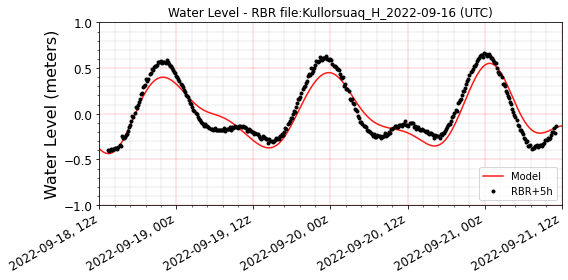

In [116]:
import matplotlib.dates as mdates

# Set up
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)

# Plot
# ln1 = plt.plot(rt_minus1hr['waterlevel_shifted'], 
#                linestyle='-', 
#                marker='', 
#                color='black', 
#                label='GreenlandRising',
#                alpha=1,
#               )
ln1 = plt.plot(df_model[['SSH']]/100, 
               linestyle='-', 
               marker='', 
               color='red', 
               label='Model',
               alpha=0.9,
              )
# ln2 = plt.plot(df_rbr[['Depth_shifted']], 
#                linestyle='', 
#                marker='.', 
#                color='grey', 
#                label='RBR',
#                alpha=0.5,
#               )
ln3 = plt.plot(df_rbr_plus5hr[['Depth_shifted']], 
               linestyle='', 
               marker='.', 
               color='black', 
               label='RBR+5h',
               alpha=1,
              )


# Customize
ax.set_title(f'Water Level - RBR file:{file_in} (UTC)')
ax.set_ylabel('Water Level (meters)', fontsize=16)

# Grids
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.2', color='red')
ax.grid(which='minor', linestyle=':', linewidth='0.2', color='black')

# xaxis
# plt.xlim(starttime, endtime)
plt.xlim(plot_start, plot_end)
plt.ylim(-1, 1)
ax.set_axisbelow(True)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d, %Hz'))
fig.autofmt_xdate()
ax.tick_params(axis='both', labelsize=12)

plt.legend()
plt.tight_layout()
plt.savefig('figs/lineplot_Kullorsuaq_compareRBR_19Sep2022_UTC.png',
            facecolor='white', 
            transparent=False,
           )

# Notes

- Is the time shift correct?
- Looks like RBR was set to UTC-5 using the last deployment file.
- Make sure model output is UTC.  It has a "-200" string in the time column...